## Purpose
This notebook what factors may influence well longevity. For this, we are only looking at wells between the ages of 20 and 40 years old.


# Import and processing

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('../data/train_data.csv')
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
y_train = pd.read_csv('../data/train_targets.csv')
y_train

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [4]:
df = X_train.merge(y_train, on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Calculating Well Age
Because the records were taken at different times, it would be more accurate to calculate the age of each well. To get the age of the well we will subtract the construction year from the date record.

In [19]:
df['date_recorded'] = pd.to_datetime(df.date_recorded, yearfirst=True)


has_year = df[df['construction_year'] !=0]
has_year['age'] = has_year.date_recorded.map(lambda x: x.year) - has_year.construction_year

#### We will drop negative ages for the purposes of this analysis.
has_year = has_year[has_year['age']>0]

# Analysis of Wells Age 20 and older

In [21]:
subset = has_year[has_year['age']>=20]

In [23]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12510 entries, 3 to 59391
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     12510 non-null  int64         
 1   amount_tsh             12510 non-null  float64       
 2   date_recorded          12510 non-null  datetime64[ns]
 3   funder                 11887 non-null  object        
 4   gps_height             12510 non-null  int64         
 5   installer              11885 non-null  object        
 6   longitude              12510 non-null  float64       
 7   latitude               12510 non-null  float64       
 8   wpt_name               12510 non-null  object        
 9   num_private            12510 non-null  int64         
 10  basin                  12510 non-null  object        
 11  subvillage             12509 non-null  object        
 12  region                 12510 non-null  object        
 13  r

In [44]:
subset.status_group.value_counts()/len(subset)*100

non functional             54.724221
functional                 37.745803
functional needs repair     7.529976
Name: status_group, dtype: float64

A few studies mentioned two important factors for determining well functionality: [management](https://openknowledge.worldbank.org/handle/10986/31233) and [installer](https://www.ircwash.org/sites/default/files/Jarman-WAMMA-1997.pdf). In our search for the factors that keep wells functional after the age of 20, we will start with those two features.

### Installer

#### We will start with government installed wells because the government has recieved criticism for the way they handled water infrastructure. First we will see what percentage of these wells are functioning compared to all wells aged 20 and over.

In [140]:
subset = has_year[has_year['construction_year']<=1980]

In [143]:
subset.installer.value_counts()[:15]/len(subset)*100

DWE                        39.704605
RWE                         9.296264
Government                  7.124240
District council            3.040834
Central govt                2.189401
Idara ya maji               2.067767
FW                          1.702867
Commu                       1.424848
0                           1.320591
Wizara ya maji              1.094700
FINI WATER                  1.077324
District Council            1.042572
Fini water                  1.025195
LGA                         1.025195
Region water Department     0.973067
Name: installer, dtype: float64

In [165]:
plt.style.use('ggplot')

government = subset[(subset['installer']=='Central government')|(subset['installer']=='Government')]
functional_gov = government[government['status_group']=='functional']
percent_funct_gov = (len(functional_gov)/len(government))*100

community = subset[(subset['installer']=='DWE')|(subset['installer']=='DWE')]
functional_com = community[community['status_group']=='functional']
percent_funct_com = (len(functional_com)/len(community))*100

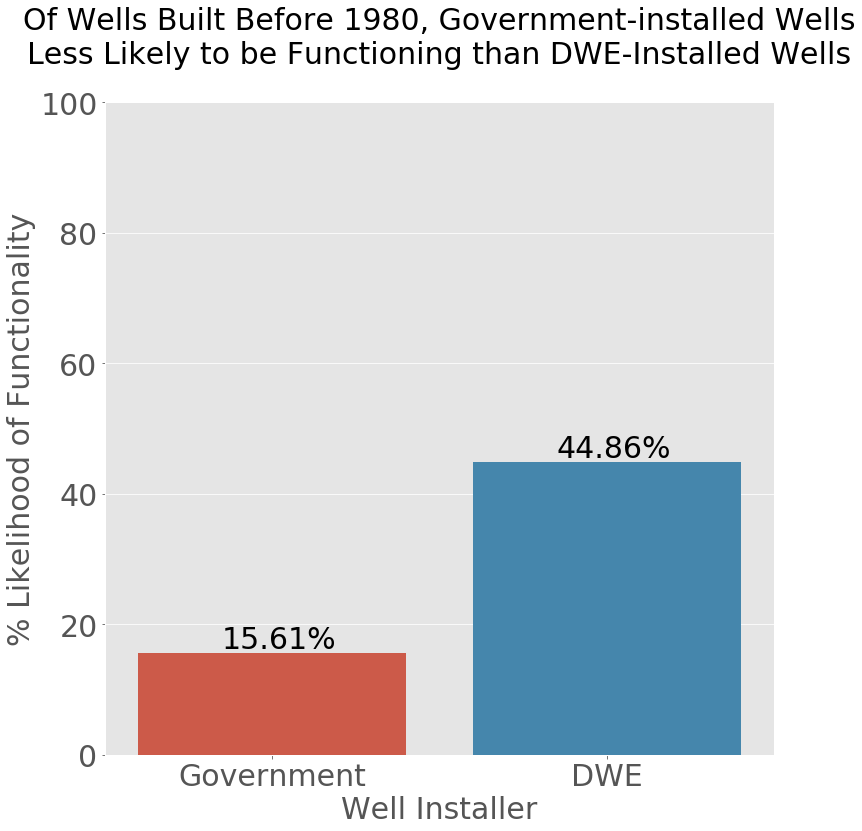

In [167]:
y=[percent_funct_gov, percent_funct_com]

fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.set_title('Of Wells Built Before 1980, Government-installed Wells\nLess Likely to be Functioning than DWE-Installed Wells\n', fontsize = 30)
ax.set_xlabel('Well Installer', fontsize=30)
ax.set_ylabel('% Likelihood of Functionality', fontsize=30)
ax.set_ylim(0,100)
ax.tick_params(labelsize=30)

for i in range(2):
    plt.text(x = i-.15 , y =y[i]+.8, s = str(round(y[i], 2))+'%', size = 30)

sns.barplot(x=[f'Government', 'DWE'], y=y)
plt.savefig('../reports/figures/installer.png', transparent=True)

### Management

In [ ]:
subset = has_year[has_year['age']>=20]

In [88]:
subset.management.value_counts()[:15]/len(subset)*100

vwc                 79.480416
wua                  6.075140
water board          3.453237
wug                  2.302158
water authority      2.150280
company              1.886491
other                1.366906
parastatal           1.111111
unknown              1.007194
private operator     0.943245
trust                0.143885
other - school       0.079936
Name: management, dtype: float64

#### Wells managed by village water councils were found to be more likely to be nonfunctioning if the well was old.

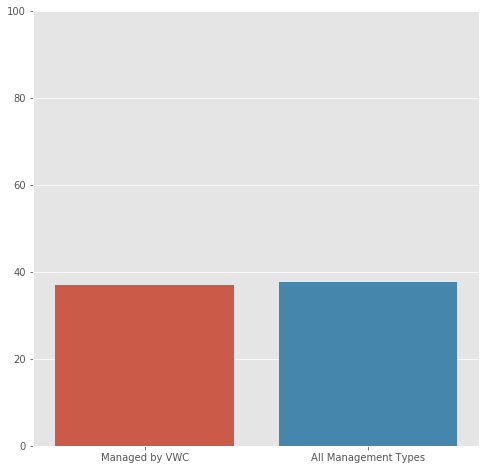

In [41]:
vwc = subset[subset['management']=='vwc']
vwc_functional = vwc[vwc['status_group']=='functional']
percent_funct_vwc = (len(vwc_functional)/len(vwc))*100

funct_all = subset[subset['status_group']=='functional']
percent_funct_all = (len(funct_all)/len(subset))*100
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_ylim(0,100)
sns.barplot(x=['Managed by VWC', 'All Management Types'], y=[percent_funct_vwc, percent_funct_all])

### Choosing features
If we want to find a feature that can indicates well status we should find a feature whose values are can more closely approximate the 38% functioning vs 55% nonfunctioning split.

### Extraction Type

In [48]:
subset.extraction_type.value_counts()/len(subset)*100

gravity                      54.700240
other                        14.540368
submersible                   8.185452
mono                          5.555556
swn 80                        4.924061
nira/tanira                   4.356515
india mark ii                 3.820943
ksb                           2.142286
afridev                       1.047162
other - swn 81                0.351719
windmill                      0.175859
other - rope pump             0.103917
other - play pump             0.079936
other - mkulima/shinyanga     0.007994
walimi                        0.007994
Name: extraction_type, dtype: float64

Here we see that about half the pumps use gravity as an extraction method. If the majority of these pumps are nonfunctioning, then this may be a good predictor.

In [55]:
def compare(column, value):
    sample = subset[subset[column]==value]
    functional_sample = sample[sample['status_group']=='functional']
    percent_funct_sample = (len(functional_sample)/len(sample))*100

    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.set_ylim(0,100)
    sns.barplot(x=[f'{column} equal to {value}', 'All Management Types'], y=[percent_funct_sample, percent_funct_all])

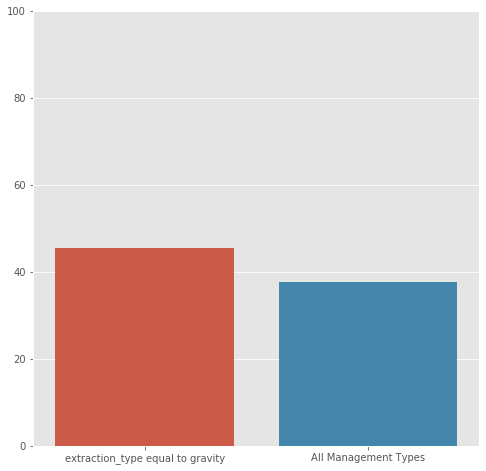

In [56]:
compare('extraction_type', 'gravity')

### Payment Type

In [62]:
subset.payment_type.value_counts()/len(subset)*100

never pay     42.206235
monthly       18.217426
unknown       15.579536
per bucket     9.312550
annually       7.905675
on failure     6.155076
other          0.623501
Name: payment_type, dtype: float64

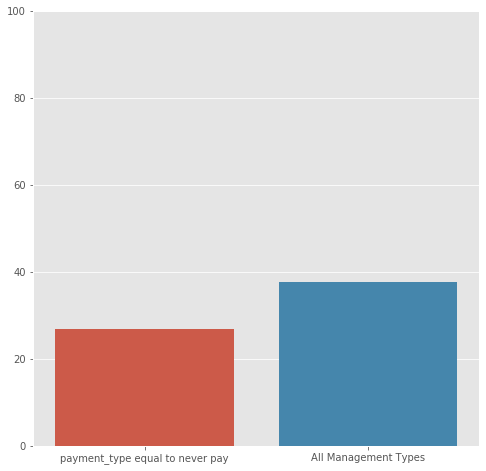

In [76]:
compare('payment_type', 'never pay')

### Funder

In [124]:
subset.funder.value_counts()[:15]/len(subset)*100

Government Of Tanzania    31.191047
Danida                     9.312550
Norad                      5.803357
Unicef                     5.083933
Ministry Of Water          3.173461
Fini Water                 2.733813
Tcrs                       2.725819
District Council           2.134293
Rudep                      1.782574
Finw                       1.646683
Fw                         1.366906
Hesawa                     1.310951
Lga                        1.199041
Dwe                        1.183054
Dh                         1.063149
Name: funder, dtype: float64

Here we see that about half the pumps use gravity as an extraction method. If the majority of these pumps are nonfunctioning, then this may be a good predictor.

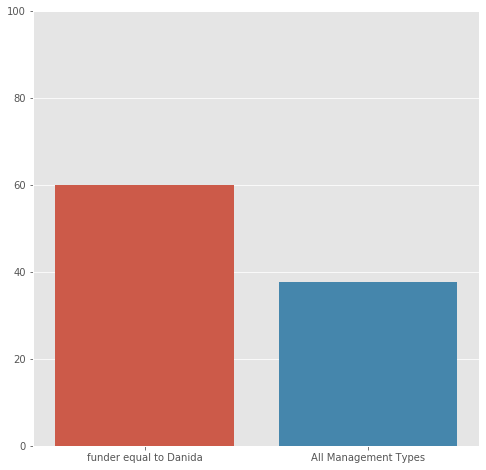

In [126]:
compare('funder', 'Danida')

### Region

In [89]:
subset.region.value_counts()/len(subset)*100

Iringa           11.726619
Kilimanjaro       9.768185
Rukwa             9.656275
Morogoro          9.328537
Tanga             8.545164
Ruvuma            7.553957
Kigoma            7.466027
Mtwara            7.410072
Singida           6.922462
Arusha            5.667466
Lindi             5.539568
Mara              4.436451
Pwani             2.549960
Manyara           1.702638
Mwanza            0.927258
Dar es Salaam     0.767386
Shinyanga         0.031974
Name: region, dtype: float64

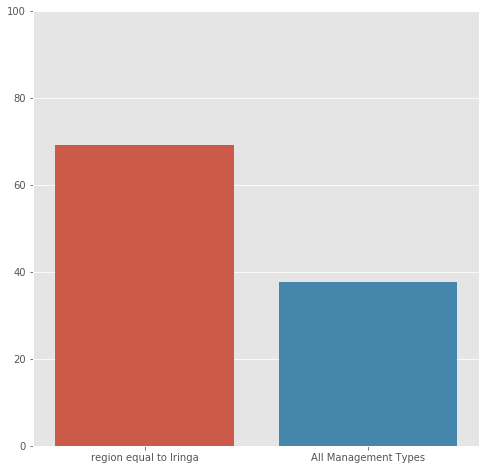

In [111]:
compare('region', 'Iringa')

### Source Type

In [101]:
subset.source_type.value_counts()/len(subset)*100

spring                  31.518785
river/lake              27.474021
borehole                20.143885
shallow well            19.056755
dam                      0.735412
rainwater harvesting     0.551559
other                    0.519584
Name: source_type, dtype: float64

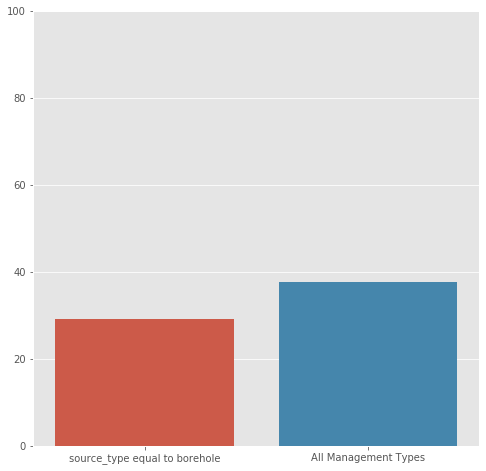

In [105]:
compare('source_type', 'borehole')

### Basin

In [112]:
subset.basin.value_counts()/len(subset)*100

Pangani                    22.949640
Ruvuma / Southern Coast    15.955236
Rufiji                     15.227818
Lake Tanganyika            11.974420
Wami / Ruvu                 9.040767
Internal                    8.713030
Lake Nyasa                  5.555556
Lake Victoria               5.419664
Lake Rukwa                  5.163869
Name: basin, dtype: float64

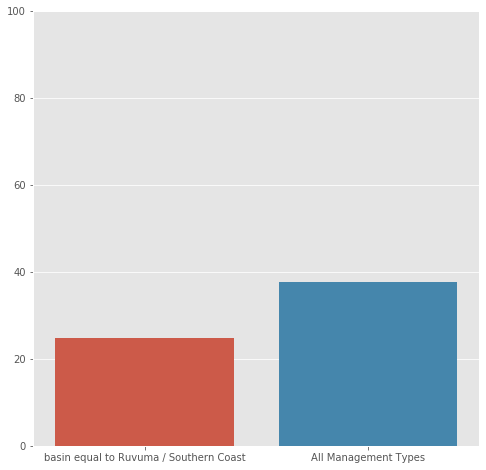

In [119]:
compare('basin', 'Ruvuma / Southern Coast')